In [21]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = pd.read_csv("nagaoka_gc/train/train_data.csv")
train_data.head()

,File name,GC
0,08DE663C,0
1,08EE752D,1
2,08DE663D,0
3,08EE751D,1
4,08DE664B,0


In [4]:
test_data = pd.read_csv("nagaoka_gc/test/test_data.csv")
test_data.head()

,File name,GC
0,08DE762D,0
1,08EE780C,1
2,08EE050C,0
3,08EE972C,1
4,08DE863C,0


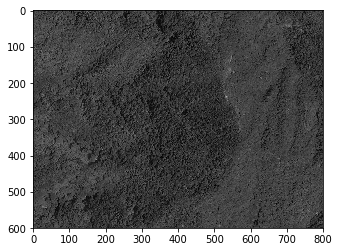

In [7]:
sample1 = Image.open("nagaoka_gc/train/08DE663C.jpg").convert("L")
plt.imshow(sample1,cmap="gray")

In [11]:
sample1_array = np.array(sample1)
sample1_array.shape

(600, 800)

In [22]:
train_len = len(train_data)
X_train = np.empty((train_len*4,600*800),dtype=np.uint8)
y_train = np.empty((train_len*4),dtype=np.uint8)

for i in range(train_len):
    
    name = train_data.loc[i,"File name"]
    train_img = Image.open(f"nagaoka_gc/train/{name}.jpg").convert("L")
    train_img = np.array(train_img)
    train_img_f = train_img.flatten()
    X_train[i] = train_img_f
    y_train[i] = train_data.loc[i,"GC"]
    
    train_img_lr = np.fliplr(train_img)
    train_lr_f = train_img_lr.flatten()
    X_train[i+train_len] = train_lr_f
    y_train[i+train_len] = train_data.loc[i,"GC"]
    
    train_img_up = np.flipud(train_img)
    train_up_f = train_img_up.flatten()
    X_train[i+train_len*2] = train_up_f
    y_train[i+train_len*2] = train_data.loc[i,"GC"]
    
    train_img_rot = np.rot90(train_img,2)
    train_rot_f = train_img_rot.flatten()
    X_train[i+train_len*3] = train_rot_f
    y_train[i+train_len*3] = train_data.loc[i,"GC"]

In [29]:
test_len = len(test_data)
X_test = np.empty((test_len,600*800),dtype=np.uint8)
y_test = np.empty(test_len,dtype=np.uint8)

for i in range(test_len):
    name = test_data.loc[i,"File name"]
    test_img = Image.open(f"nagaoka_gc/test/{name}.jpg").convert("L")
    test_img = np.array(test_img)
    test_img_f = test_img.flatten()
    X_test[i] = test_img_f
    y_test[i] = test_data.loc[i,"GC"]

In [30]:
classifier = SVC(kernel="linear",gamma="auto",random_state=1)
classifier.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
y_pred = classifier.predict(X_test)

print(metrics.confusion_matrix(y_test,y_pred))

[[3 0]
 [0 3]]


In [32]:
y_pred

array([0, 1, 0, 1, 0, 1], dtype=uint8)

In [33]:
y_test

array([0, 1, 0, 1, 0, 1], dtype=uint8)